# Gather Section (20 Questions, 40 Marks)

You should have access to a file called TMDB.db. The first step to answering this set of questions will be to connect to this db file to access the data.

![SQL Architectures](https://raw.githubusercontent.com/Explore-AI/Public-Data/master/image/TMDB_ERD.JPG)

Before we start we need to load our SQL magic commands (we only need do this once per notebook):

In [ ]:
%load_ext sql




Based on that data, answer the following questions:


### Question 1
What is the code you can use to connect to the TMDB database that is saved in a Colab notebook?


In [ ]:
%sql sqlite:///TMDB.db

### Question 2
What is the primary key for the table “movies”?



In [ ]:
%%sql
PRAGMA table_info(movies);

 * sqlite:///TMDB.db
Done.


cid,name,type,notnull,dflt_value,pk
0,movie_id,INTEGER,1,None,1
1,title,varchar(500),0,NULL,0
2,release_date,datetime(6),0,NULL,0
3,budget,INTEGER,0,NULL,0
4,homepage,varchar(500),0,NULL,0
5,original_language,varchar(50),0,NULL,0
6,original_title,varchar(500),0,NULL,0
7,overview,varchar(5000),0,NULL,0
8,popularity,double,0,NULL,0
9,revenue,double,0,NULL,0


### Question 3
How many foreign keys does the “languagemap” table have?



In [ ]:
%%sql
PRAGMA foreign_key_list(languagemap);

 * sqlite:///TMDB.db
Done.


id,seq,table,from,to,on_update,on_delete,match
0,0,movies,movie_id,movie_id,NO ACTION,NO ACTION,NONE
1,0,languages,iso_639_1,iso_639_1,NO ACTION,NO ACTION,NONE


### Question 4
What code would you use to set up a view of all movies that did not get released?


In [ ]:
%%sql
CREATE VIEW Notreleased_movies AS
SELECT *
FROM movies
WHERE release_status <> 'Released';

 * sqlite:///TMDB.db
Done.


[]

In [ ]:
%%sql
SELECT DISTINCT release_status FROM movies;

 * sqlite:///TMDB.db
Done.


release_status
Released
Rumored
Post Production


### Question 5
How would you select only the title, release date, and release status columns from the view you created in the previous question?


In [ ]:
%%sql
SELECT title, release_date, release_status FROM unreleased_movies;


 * sqlite:///TMDB.db
Done.


title,release_date,release_status
Little Big Top,2006-01-01 00:00:00.000000,Rumored
The Helix... Loaded,2005-01-01 00:00:00.000000,Rumored
Higher Ground,2011-08-26 00:00:00.000000,Post Production
Crying with Laughter,2009-06-01 00:00:00.000000,Rumored
The Harvest (La Cosecha),2011-07-29 00:00:00.000000,Rumored
The Naked Ape,2006-09-16 00:00:00.000000,Rumored
Brotherly Love,2015-04-24 00:00:00.000000,Post Production
Dancin' It's On,2015-10-16 00:00:00.000000,Post Production


### Question 6
How many movies are no longer using their original titles?



In [ ]:
%%sql
SELECT COUNT(*)
FROM movies
WHERE title != original_title;

 * sqlite:///TMDB.db
Done.


COUNT(*)
261


### Question 7
What is the most popular movie that was made after 01/01/2000 with a budget of more than $100 000 000? (Hint: Use the popularity field in the Movies table. Larger numbers are more popular.)


In [ ]:
%%sql
SELECT title, popularity
FROM movies
WHERE release_date > '2000-01-01' AND budget > 100000000
ORDER BY popularity DESC
LIMIT 1;

 * sqlite:///TMDB.db
Done.


title,popularity
Interstellar,724.247784


### Question 8
How many movies are there that do not have English as their original language?



In [ ]:
%%sql
select count(*)
from movies
where original_language != 'en';

 * sqlite:///TMDB.db
Done.


count(*)
298


### Question 9
In how many movies did Tom Cruise portray the character Ethan Hunt?



In [ ]:
%%sql
SELECT COUNT(*)
FROM movies m
JOIN casts c ON m.movie_id = c.movie_id
JOIN actors a ON c.actor_id = a.actor_id
WHERE a.actor_name = 'Tom Cruise' AND c.characters = 'Ethan Hunt';

 * sqlite:///TMDB.db
Done.


COUNT(*)
5


### Question 10
How many times was the actress Cate Blanchett nominated for an Oscar?

In [ ]:
%%sql
select count(*)
from oscars
where name = 'Cate Blanchett';

 * sqlite:///TMDB.db
Done.


count(*)
7


### Question 11
What would be the code to insert a new genre called ‘Sport’ with an id of 10?


In [ ]:
%%sql
INSERT INTO genres (genre_id, genre_name)
VALUES (10, 'Sport');

 * sqlite:///TMDB.db
1 rows affected.


[]

### Question 12
You have just watched The Flintstones movie and did not find it very funny. What code would delete the entry that links The Flintstones to the Comedy genre?


In [ ]:
%%sql
DELETE FROM GenreMap
WHERE movie_id = (SELECT movie_id FROM movies WHERE title = 'The Flintstones')
AND genre_id = (SELECT genre_id FROM genres WHERE genre_name = 'Comedy');

 * sqlite:///TMDB.db
1 rows affected.


[]

### Question 13
What code will give me the 10 most recently released movies in the database? and put it in a list


In [ ]:
%%sql
SELECT title, release_date
FROM movies
ORDER BY release_date DESC
LIMIT 10;

 * sqlite:///TMDB.db
Done.


title,release_date
Growing Up Smith,2017-02-03 00:00:00.000000
Two Lovers and a Bear,2016-10-02 00:00:00.000000
Mr. Church,2016-09-16 00:00:00.000000
The Birth of a Nation,2016-09-09 00:00:00.000000
Kicks,2016-09-09 00:00:00.000000
Antibirth,2016-09-02 00:00:00.000000
Hands of Stone,2016-08-26 00:00:00.000000
Ben-Hur,2016-08-17 00:00:00.000000
Pete's Dragon,2016-08-10 00:00:00.000000
Suicide Squad,2016-08-02 00:00:00.000000


In [ ]:
%%sql
SELECT * FROM movies LIMIT 5;

 * sqlite:///TMDB.db
Done.


movie_id,title,release_date,budget,homepage,original_language,original_title,overview,popularity,revenue,runtime,release_status,tagline,vote_average,vote_count
5,Four Rooms,1995-12-09 00:00:00.000000,4000000,None,en,Four Rooms,It's Ted the Bellhop's first night on the job...and the hotel's very unusual guests are about to place him in some outrageous predicaments. It seems that this evening's room service is serving up one unbelievable happening after another.,22.87623,4300000.0,98.0,Released,"Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who's in for the wildest New year's Eve of his life.",6.5,530
11,Star Wars,1977-05-25 00:00:00.000000,11000000,http://www.starwars.com/films/star-wars-episode-iv-a-new-hope,en,Star Wars,Princess Leia is captured and held hostage by the evil Imperial forces in their effort to take over the galactic Empire. Venturesome Luke Skywalker and dashing captain Han Solo team together with the loveable robot duo R2-D2 and C-3PO to rescue the beautiful princess and restore peace and justice in the Empire.,126.393695,775398007.0,121.0,Released,"A long time ago in a galaxy far, far away...",8.1,6624
12,Finding Nemo,2003-05-30 00:00:00.000000,94000000,http://movies.disney.com/finding-nemo,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexpectedly taken from his Great Barrier Reef home to a dentist's office aquarium. It's up to his worrisome father Marlin and a friendly but forgetful fish Dory to bring Nemo home -- meeting vegetarian sharks, surfer dude turtles, hypnotic jellyfish, hungry seagulls, and more along the way.",85.688789,940335536.0,100.0,Released,"There are 3.7 trillion fish in the ocean, they're looking for one.",7.6,6122
13,Forrest Gump,1994-07-06 00:00:00.000000,55000000,None,en,Forrest Gump,"A man with a low IQ has accomplished great things in his life and been present during significant historic events - in each case, far exceeding what anyone imagined he could do. Yet, despite all the things he has attained, his one true love eludes him. 'Forrest Gump' is the story of a man who rose above his challenges, and who proved that determination, courage, and love are more important than ability.",138.133331,677945399.0,142.0,Released,"The world will never be the same, once you've seen it through the eyes of Forrest Gump.",8.2,7927
14,American Beauty,1999-09-15 00:00:00.000000,15000000,http://www.dreamworks.com/ab/,en,American Beauty,"Lester Burnham, a depressed suburban father in a mid-life crisis, decides to turn his hectic life around after developing an infatuation with his daughter's attractive friend.",80.878605,356296601.0,122.0,Released,Look closer.,7.9,3313


In [ ]:
%%sql
SELECT AVG(budget) AS average_budget, AVG(revenue) AS average_revenue
FROM movies;

 * sqlite:///TMDB.db
Done.


average_budget,average_revenue
29045039.87528628,82260638.65167603


distribution of movies by language

In [ ]:
%%sql
SELECT original_language, COUNT(*) AS movie_count
FROM movies
GROUP BY original_language
ORDER BY movie_count DESC;


 * sqlite:///TMDB.db
Done.


original_language,movie_count
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


movies released in 2004

In [ ]:
%%sql
SELECT title, release_date
FROM movies
WHERE strftime('%Y', release_date) = '2004';

 * sqlite:///TMDB.db
Done.


title,release_date
Eternal Sunshine of the Spotless Mind,2004-03-19 00:00:00.000000
Million Dollar Baby,2004-12-15 00:00:00.000000
Before Sunset,2004-02-10 00:00:00.000000
Open Water,2004-08-06 00:00:00.000000
Ocean's Twelve,2004-12-09 00:00:00.000000
Saw,2004-10-01 00:00:00.000000
Hotel Rwanda,2004-09-11 00:00:00.000000
Riding Giants,2004-07-09 00:00:00.000000
Catwoman,2004-07-22 00:00:00.000000
Summer Storm,2004-09-02 00:00:00.000000


number of movies based on their genre

In [ ]:
%%sql
SELECT g.genre_name, COUNT(*) AS movie_count
FROM genres g
JOIN GenreMap gm ON g.genre_id = gm.genre_id
GROUP BY g.genre_name
ORDER BY movie_count DESC ;


 * sqlite:///TMDB.db
Done.


genre_name,movie_count
Drama,2297
Comedy,1721
Thriller,1274
Action,1154
Romance,894
Adventure,790
Crime,696
Science Fiction,535
Horror,519
Family,513


movies_rate based on their genre

In [ ]:
%%sql
SELECT g.genre_name, AVG(m.vote_average) AS average_rating
FROM movies m
JOIN genremap gm ON m.movie_id = gm.movie_id
JOIN genres g ON gm.genre_id = g.genre_id
GROUP BY g.genre_name
ORDER BY average_rating DESC;


 * sqlite:///TMDB.db
Done.


genre_name,average_rating
History,6.71979695431472
War,6.713888888888885
Drama,6.388593818023497
Music,6.355675675675673
Foreign,6.35294117647059
Animation,6.341452991452991
Crime,6.274137931034482
Documentary,6.238181818181817
Romance,6.207718120805371
Mystery,6.183908045977013


movie_revenue based on genre

In [ ]:
%%sql
SELECT g.genre_name, AVG(m.revenue) AS average_revenue
FROM movies m
JOIN genremap gm ON m.movie_id = gm.movie_id
JOIN genres g ON gm.genre_id = g.genre_id
GROUP BY g.genre_name
ORDER BY average_revenue DESC;


 * sqlite:///TMDB.db
Done.


genre_name,average_revenue
Animation,225693025.06410256
Adventure,208660204.4949367
Fantasy,193354245.1061321
Family,162345494.52046785
Science Fiction,152456515.41121495
Action,141213097.5
War,84155874.38194445
Thriller,81044290.63500784
Mystery,78300927.47413793
Comedy,71132415.10749564


total revenues changes over the years

In [ ]:
%%sql
SELECT strftime('%Y', release_date) AS release_year, SUM(revenue) AS total_revenue
FROM movies
GROUP BY release_year
ORDER BY release_year;

 * sqlite:///TMDB.db
Done.


release_year,total_revenue
None,0.0
1916,8394751.0
1925,22000000.0
1927,650422.0
1929,4358000.0
1930,8000000.0
1932,25.0
1933,4481000.0
1934,4500000.0
1935,3202000.0


### Question 14
# Visualization with Python

You can choose **any table** from the database and create visualizations using Python libraries like **Matplotlib** or **Seaborn**. The goal is to explore and understand the data through visual analysis.

For example, you could create a **bar chart** to show the number of movies in each genre or a **scatter plot** to compare movie **budget vs. revenue**.

You can also **combine data from multiple tables** (using SQL joins) to create more complex visualizations. For instance, you might join the **Movies** table with the **Genres** table to show which genres have the highest-rated movies.



### Example Ideas:
- **Genres**: Visualize the most popular genres by the number of movies.
- **Budget vs Revenue**: Analyze the relationship between movie budget and revenue.
- **Languages**: Show the distribution of movies by language using a pie chart.
- **Movie Trends**: Visualize how the number of movie releases has changed over the years.




In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
conn = sqlite3.connect('/content/TMDB.db')

In [ ]:
def plot_bar(x, y, xlabel, ylabel, title, rotation=0):
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.show()

def plot_barh(x, y, xlabel, title):
    plt.figure(figsize=(10, 6))
    plt.barh(x, y, color='skyblue')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

def plot_scatter(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


# 1. Top 10 Most Popular Movies

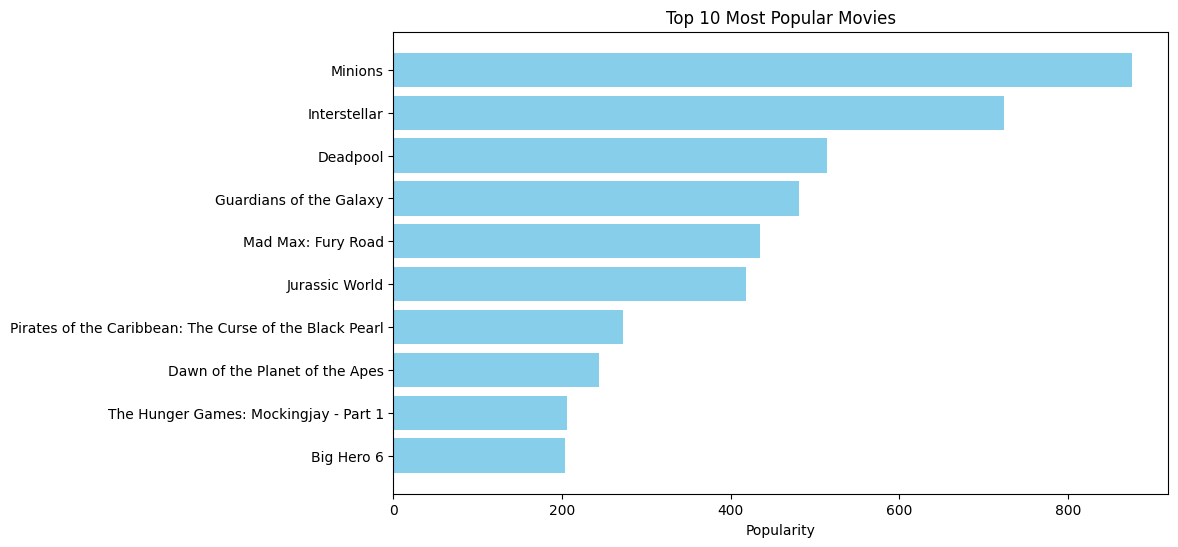

In [ ]:
query = "SELECT title, popularity FROM Movies ORDER BY popularity DESC LIMIT 10"
df = pd.read_sql_query(query, conn)
plot_barh(df['title'], df['popularity'], 'Popularity', 'Top 10 Most Popular Movies')

# 2. Top 5 Highest-Grossing Movies

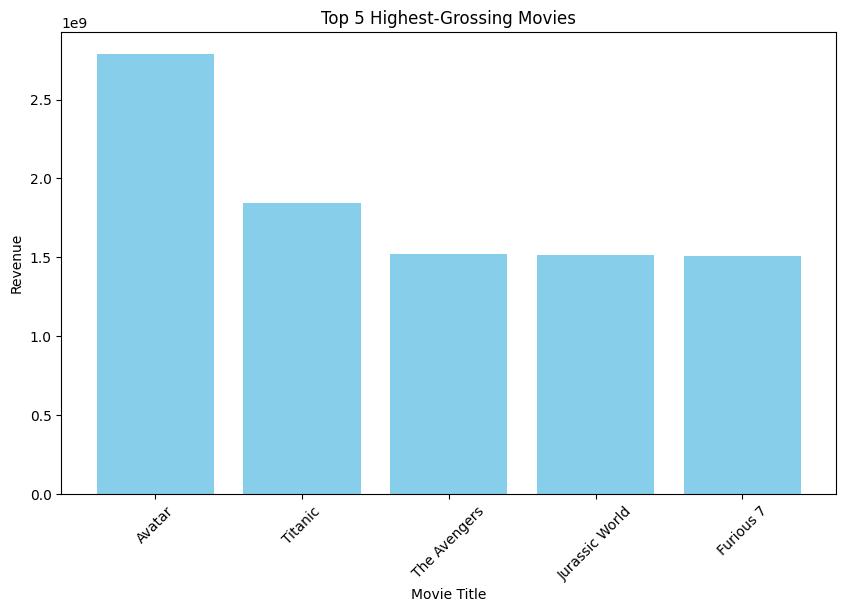

In [ ]:
query = "SELECT title, revenue FROM Movies ORDER BY revenue DESC LIMIT 5"
df = pd.read_sql_query(query, conn)
plot_bar(df['title'], df['revenue'], 'Movie Title', 'Revenue', 'Top 5 Highest-Grossing Movies', rotation=45)


# 3. Movies with the Largest Budgets


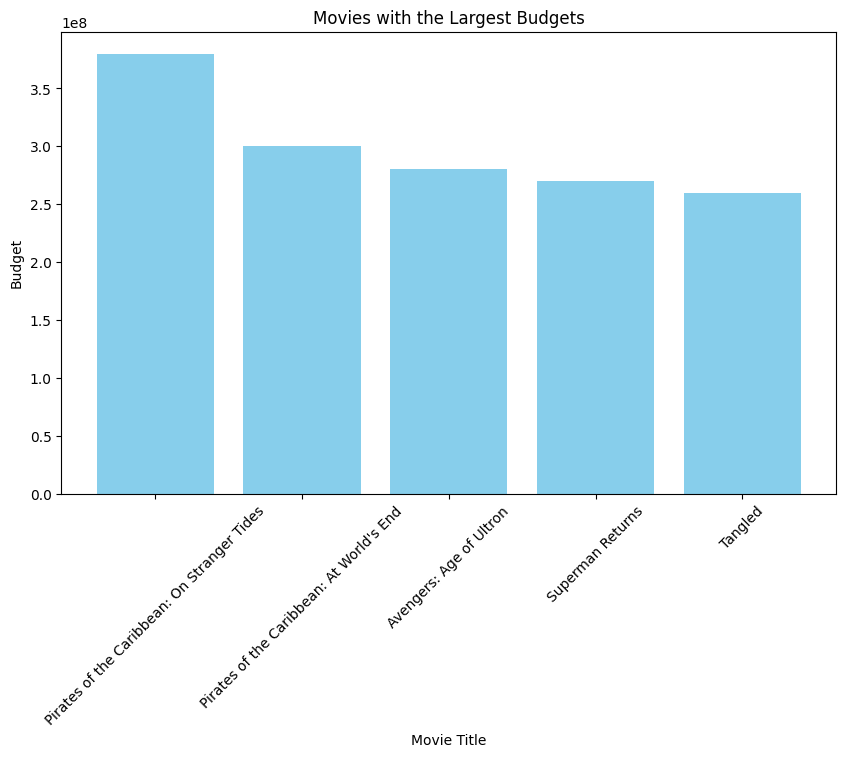

In [ ]:
query = "SELECT title, budget FROM Movies ORDER BY budget DESC LIMIT 5"
df = pd.read_sql_query(query, conn)
plot_bar(df['title'], df['budget'], 'Movie Title', 'Budget', 'Movies with the Largest Budgets', rotation=45)


# 4. Most Frequent Movie Genres

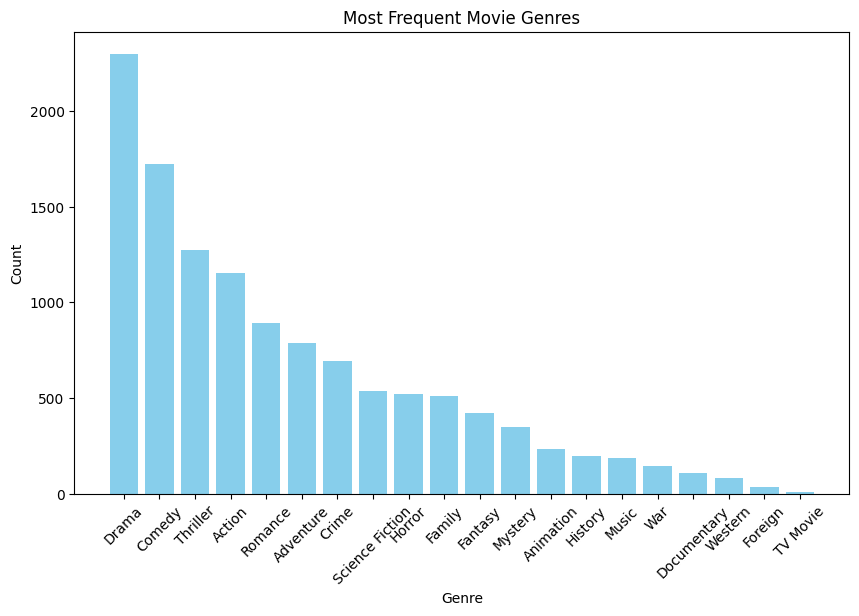

In [ ]:
query = """
SELECT g.genre_name, COUNT(gm.genre_id) as count
FROM GenreMap gm
JOIN Genres g ON gm.genre_id = g.genre_id
GROUP BY gm.genre_id
ORDER BY count DESC
"""
df = pd.read_sql_query(query, conn)
plot_bar(df['genre_name'], df['count'], 'Genre', 'Count', 'Most Frequent Movie Genres', rotation=45)


# 5. Actors Who Appeared in the Most Movies

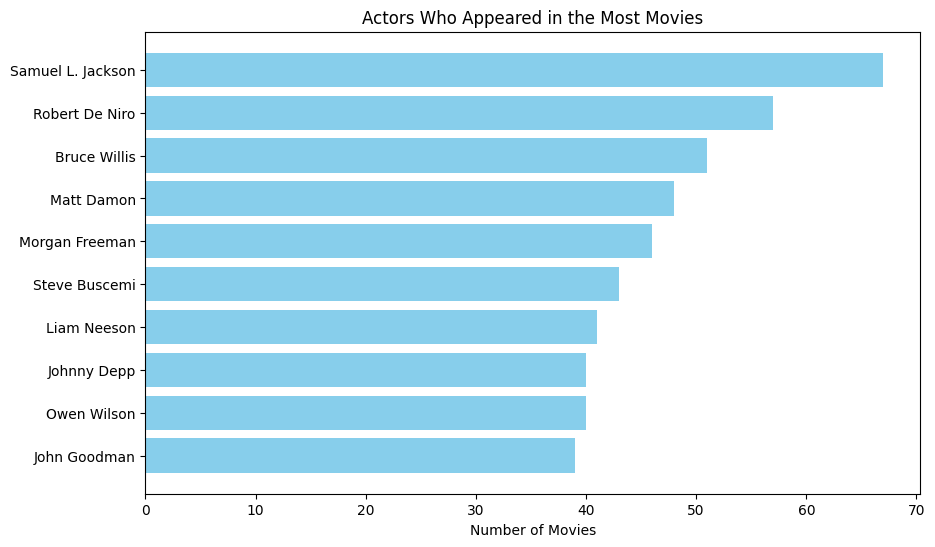

In [ ]:
query = """
SELECT a.actor_name, COUNT(c.actor_id) as movie_count
FROM Casts c
JOIN Actors a ON c.actor_id = a.actor_id
GROUP BY c.actor_id
ORDER BY movie_count DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
plot_barh(df['actor_name'], df['movie_count'], 'Number of Movies', 'Actors Who Appeared in the Most Movies')


# 6. Average Runtime of Movies per Genre

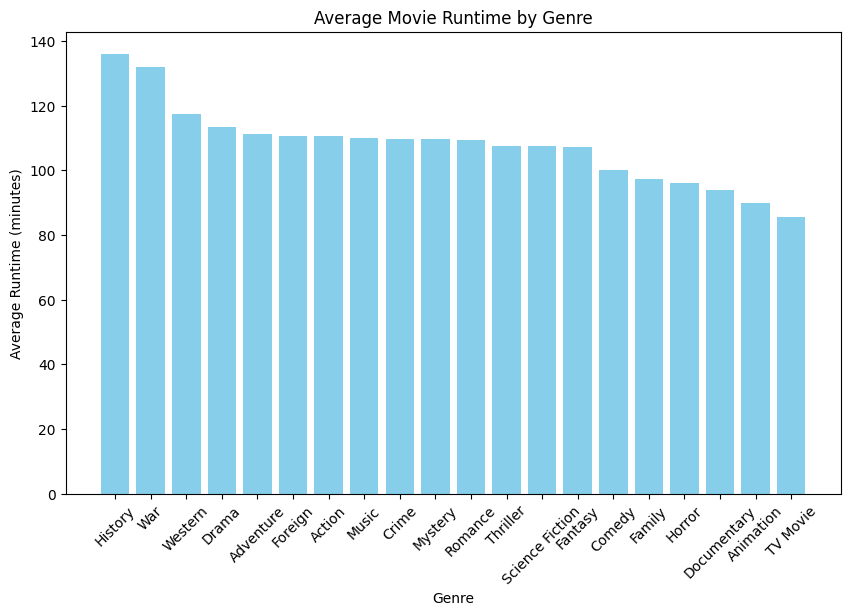

In [ ]:
query = """
SELECT g.genre_name, AVG(m.runtime) as avg_runtime
FROM Movies m
JOIN GenreMap gm ON m.movie_id = gm.movie_id
JOIN Genres g ON gm.genre_id = g.genre_id
GROUP BY g.genre_id
ORDER BY avg_runtime DESC
"""
df = pd.read_sql_query(query, conn)
plot_bar(df['genre_name'], df['avg_runtime'], 'Genre', 'Average Runtime (minutes)', 'Average Movie Runtime by Genre', rotation=45)


# 7. Most Awarded Movies at the Oscars

In [ ]:
df = pd.read_sql_query(query, conn)
print(df.isnull().sum())
df.dropna(subset=['film', 'awards_count'], inplace=True)


film            1
awards_count    0
dtype: int64


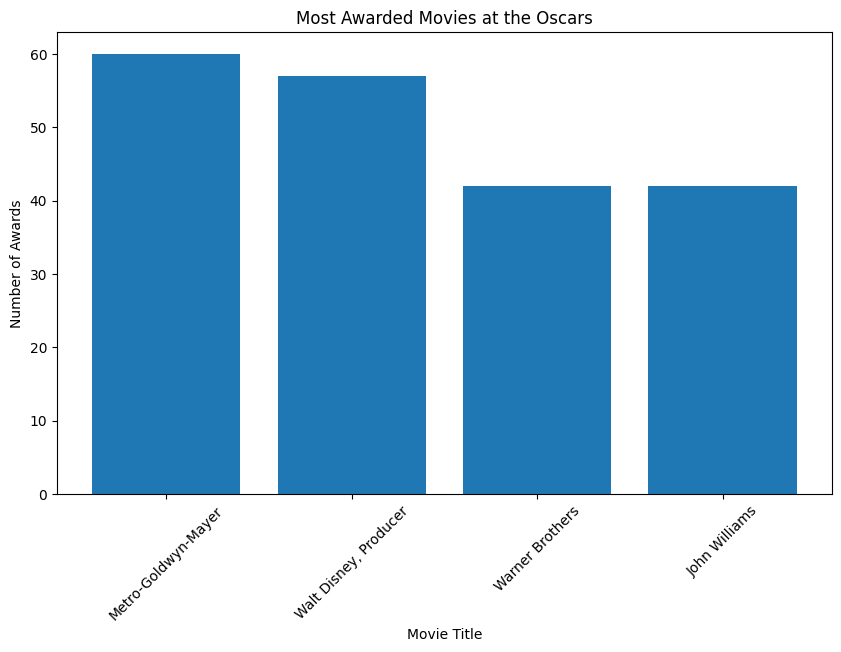

In [ ]:
def plot_bar(x, y, xlabel, ylabel, title, rotation=0):
    plt.figure(figsize=(10,6))
    plt.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.show()
plot_bar(x=df['film'], y=df['awards_count'], xlabel='Movie Title', ylabel='Number of Awards', title='Most Awarded Movies at the Oscars', rotation=45)


# 8. Top 5 Production Companies by Number of Movies

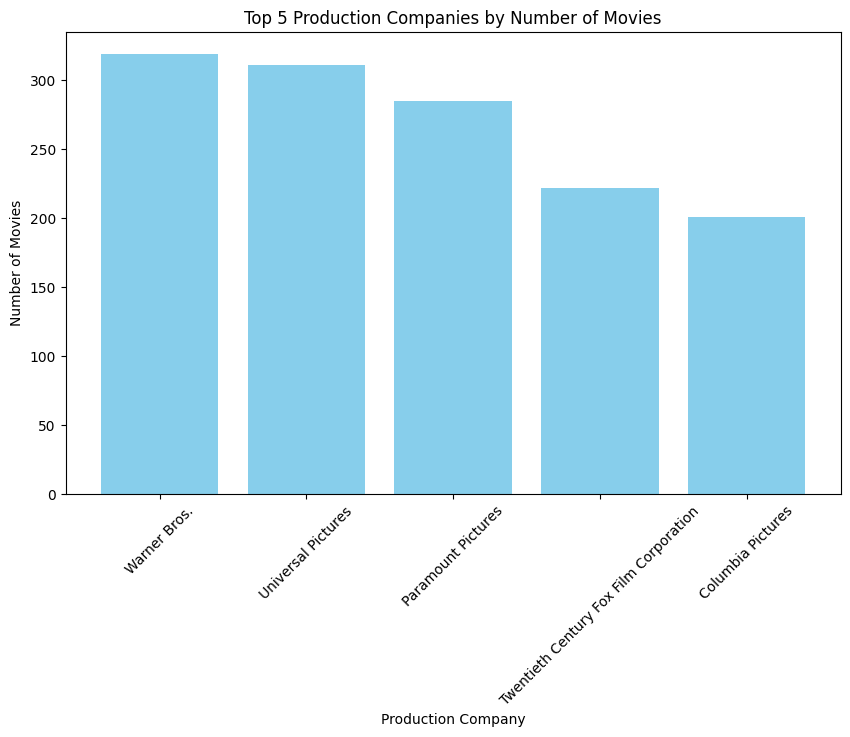

In [ ]:
query = """
SELECT pc.production_company_name, COUNT(pcm.production_company_id) as movie_count
FROM ProductionCompanyMap pcm
JOIN ProductionCompanies pc ON pcm.production_company_id = pc.production_company_id
GROUP BY pcm.production_company_id
ORDER BY movie_count DESC
LIMIT 5
"""
df = pd.read_sql_query(query, conn)
plot_bar(df['production_company_name'], df['movie_count'], 'Production Company', 'Number of Movies', 'Top 5 Production Companies by Number of Movies', rotation=45)


# 9. Movies by Language Distribution

language_name     1
language_count    0
dtype: int64


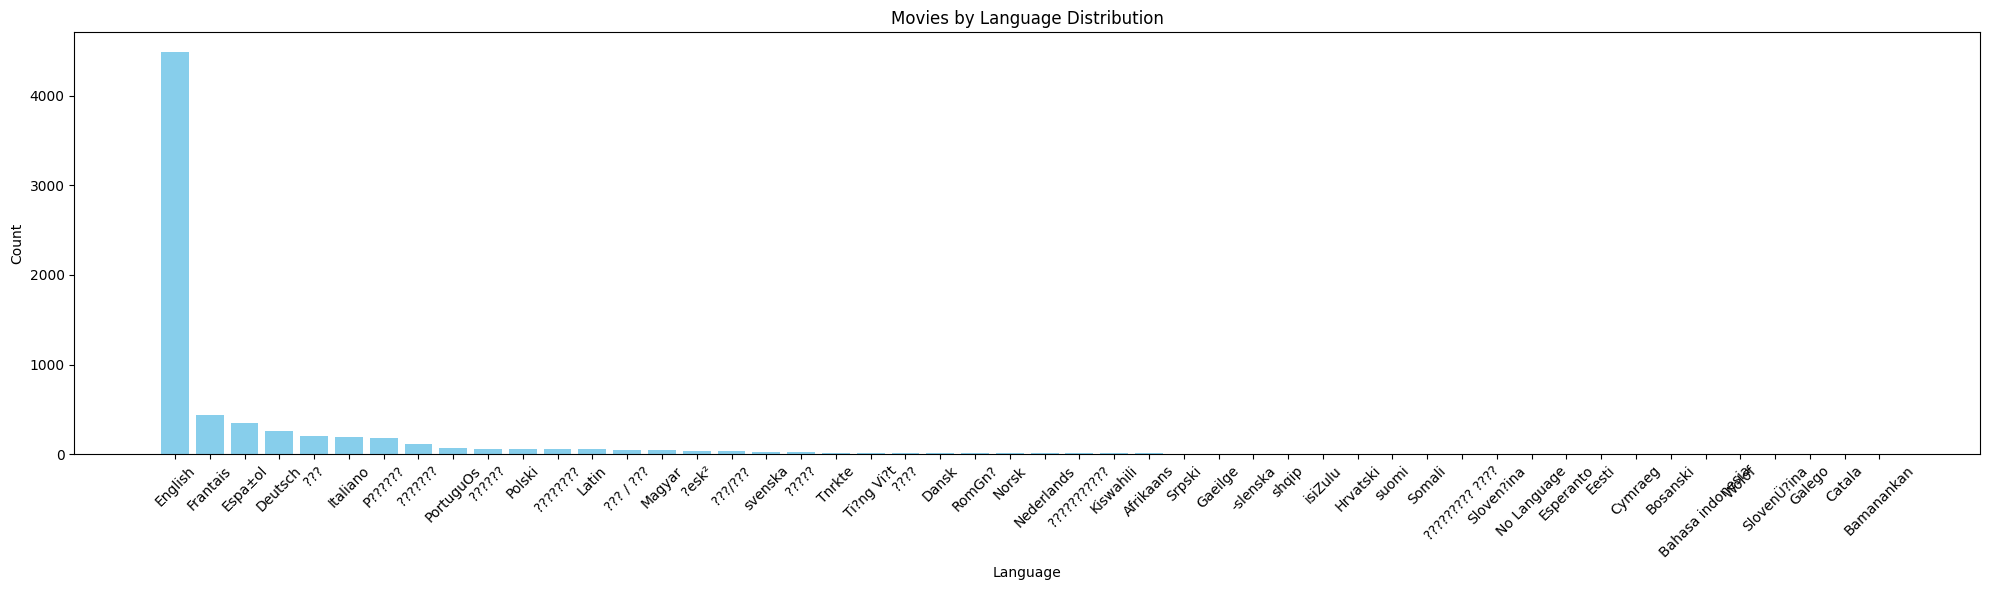

In [ ]:
query = """
SELECT l.language_name, COUNT(lm.iso_639_1) as language_count
FROM LanguageMap lm
JOIN Languages l ON lm.iso_639_1 = l.iso_639_1
GROUP BY l.language_name
ORDER BY language_count DESC
"""

df = pd.read_sql_query(query, conn)
print(df.isnull().sum())

df=df.dropna(subset=['language_name', 'language_count'])
df['language_count'] = df['language_count'].astype(int)
plot_bar(df['language_name'], df['language_count'], 'Language', 'Count', 'Movies by Language Distribution', rotation=45)



# 10. Most Frequent Keywords in Movie Descriptions

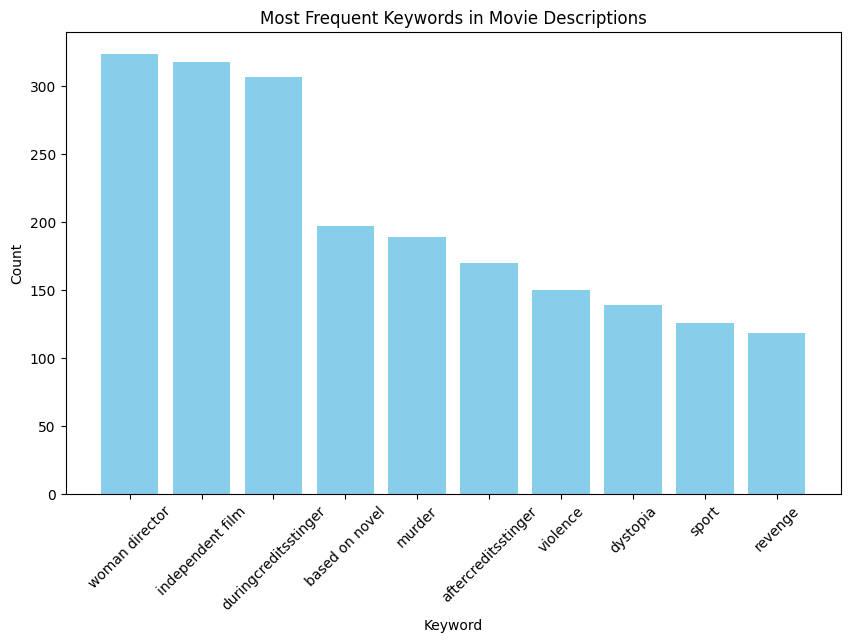

In [ ]:
query = """
SELECT k.keyword_name, COUNT(km.keyword_id) as keyword_count
FROM KeywordMap km
JOIN Keywords k ON km.keyword_id = k.keyword_id
GROUP BY k.keyword_id
ORDER BY keyword_count DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
plot_bar(df['keyword_name'], df['keyword_count'], 'Keyword', 'Count', 'Most Frequent Keywords in Movie Descriptions', rotation=45)


# 11. Top 5 Movies with the Most Votes

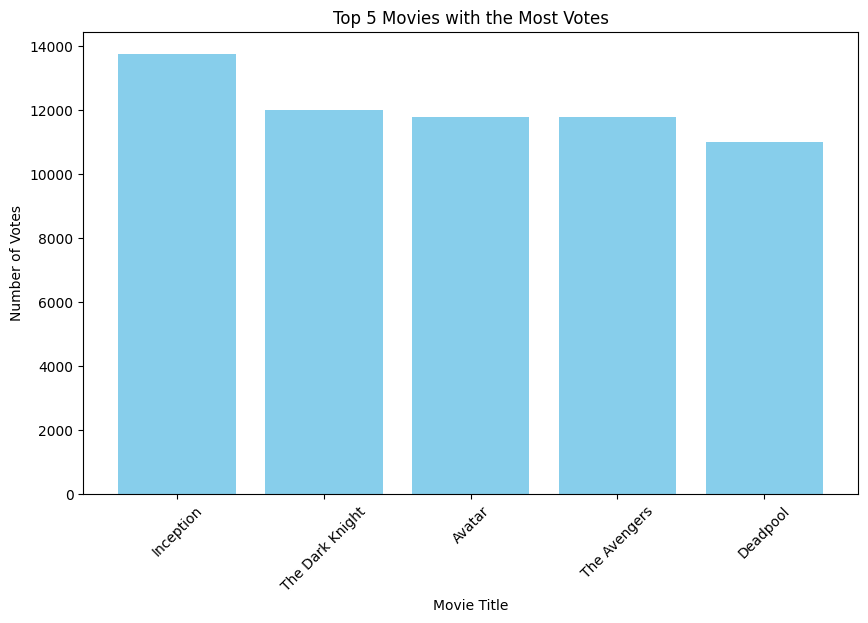

In [ ]:
query = "SELECT title, vote_count FROM Movies ORDER BY vote_count DESC LIMIT 5"
df = pd.read_sql_query(query, conn)
plot_bar(df['title'], df['vote_count'], 'Movie Title', 'Number of Votes', 'Top 5 Movies with the Most Votes', rotation=45)


# 12. Relationship Between Budget and Revenue

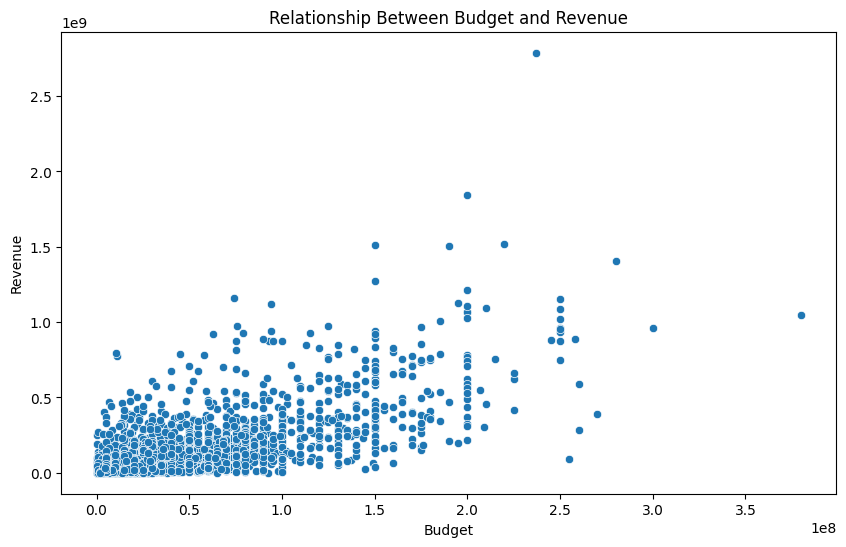

In [ ]:
query = """
SELECT budget, revenue
FROM Movies
WHERE budget > 0 AND revenue > 0
"""
df = pd.read_sql_query(query, conn)
plot_scatter(df['budget'], df['revenue'], 'Budget', 'Revenue', 'Relationship Between Budget and Revenue')


# 13. Average Movie Rating per Genre

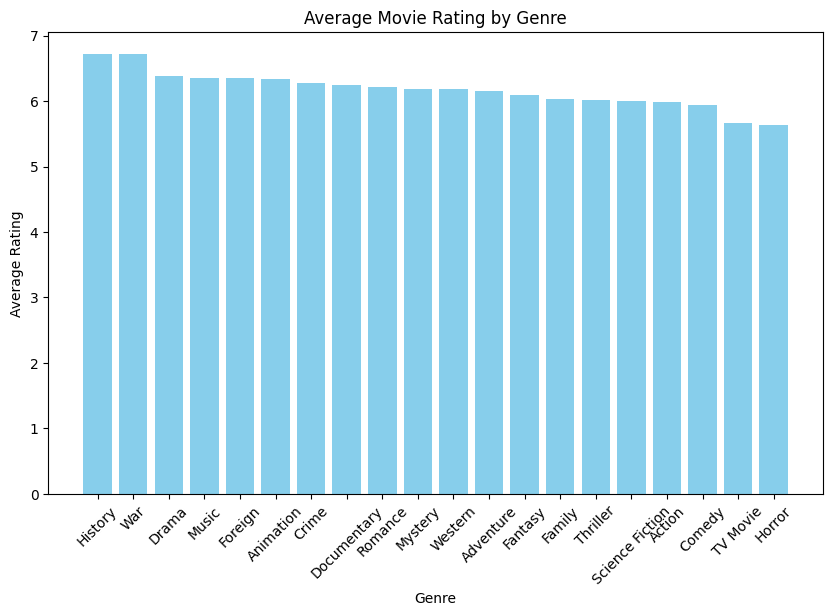

In [ ]:
query = """
SELECT g.genre_name, AVG(m.vote_average) as avg_rating
FROM Movies m
JOIN GenreMap gm ON m.movie_id = gm.movie_id
JOIN Genres g ON gm.genre_id = g.genre_id
GROUP BY g.genre_id
ORDER BY avg_rating DESC
"""
df = pd.read_sql_query(query, conn)
plot_bar(df['genre_name'], df['avg_rating'], 'Genre', 'Average Rating', 'Average Movie Rating by Genre', rotation=45)


# 14. Number of Movies Released Each Year

release_year    1
movie_count     0
dtype: int64


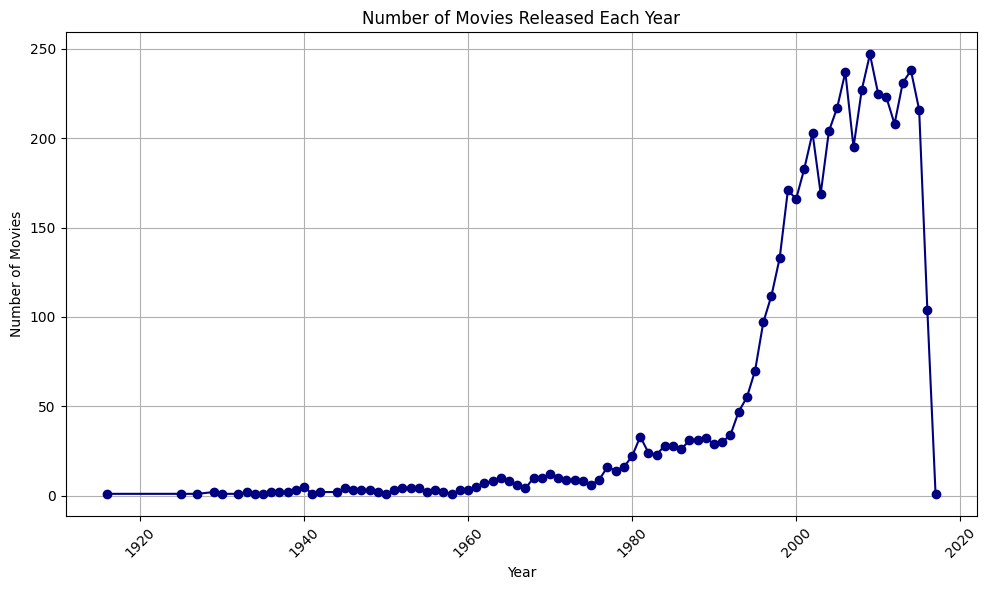

In [ ]:
query = """
SELECT strftime('%Y', release_date) as release_year, COUNT(movie_id) as movie_count
FROM Movies
GROUP BY release_year
ORDER BY release_year
"""
df = pd.read_sql_query(query, conn)
print(df.isnull().sum())


df.dropna(subset=['release_year', 'movie_count'], inplace=True)
df['release_year'] = df['release_year'].astype(int)


plt.figure(figsize=(10, 6))
plt.plot(df['release_year'], df['movie_count'], marker='o', color='navy')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



In [ ]:
conn.close()